In [1]:
import os, shutil
import time
import datetime
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping
from keras import layers
from keras import models
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import cv2

Using TensorFlow backend.


In [2]:
pd.options.display.max_colwidth = 10000

In [2]:
train_df = pd.read_excel('wilmabainbridge\demographic-others-labels.xlsx', dtype=str, delim_whitespace=True)

In [3]:
test_df = pd.read_excel('wilmabainbridge\demographic-others-labels_test.xlsx', dtype=str)

In [3]:
# train_df['Age'].astype('str')

0        3
1        2
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       4
12       5
13       4
14       4
15       4
16       4
17       4
18       4
19       3
20       5
21       4
22       3
23       4
24       3
25       2
26       3
27       4
28       3
29       4
        ..
26633    3
26634    3
26635    3
26636    3
26637    3
26638    3
26639    3
26640    3
26641    3
26642    2
26643    2
26644    2
26645    3
26646    3
26647    2
26648    2
26649    2
26650    3
26651    2
26652    3
26653    3
26654    2
26655    2
26656    3
26657    3
26658    3
26659    3
26660    3
26661    3
26662    3
Name: Age, Length: 26663, dtype: object

In [4]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [5]:
train_df.columns

Index(['Filename', 'Image #', 'Age', 'Attractive', 'Is this person famous?',
       'Common?', 'How much emotion is in this face?', 'Emotion?',
       'Eyes direction?', 'Face direction?', 'Facial hair?', 'Catch question',
       'Friendly', 'Makeup?', 'Gender',
       'Would you cast this person as the star of a movie?',
       'Would this be a good profile picture?', 'Image quality', 'Race',
       'Memorable', 'At what speed do you think this expression is happening?',
       'How much teeth is showing?'],
      dtype='object')

In [6]:
train_df['Age'].replace({'1':'< 20 years', '2':'20-30 years', '3':'30-45 years', '4':'45-60 years', '5':'60+ years'},
                               inplace=True)
# 1 = < 20 years
# 2 = 20 - 30 years
# 3 = 30 - 45 years
# 4 = 45 - 60 years
# 5 = 60+ years
train_df['Gender'].replace({'0': 'Female', '1':'Male'}, inplace=True)

In [7]:
test_df['Age'].replace({'1':'< 20 years', '2':'20-30 years', '3':'30-45 years', '4':'45-60 years', '5':'60+ years'},
                               inplace=True)
# 1 = < 20 years
# 2 = 20 - 30 years
# 3 = 30 - 45 years
# 4 = 45 - 60 years
# 5 = 60+ years
test_df['Gender'].replace({'0': 'Female', '1':'Male'}, inplace=True)

In [23]:
# age = train_df[['Filename', 'Age']]
# age.head()

,Filename,Age
0,Google_1_Danielle Goble_5_oval.jpg,30to45
1,Google_1_Danielle Goble_5_oval.jpg,20to30
2,Google_1_Danielle Goble_5_oval.jpg,30to45
3,Google_1_Danielle Goble_5_oval.jpg,30to45
4,Google_1_Danielle Goble_5_oval.jpg,30to45


In [8]:
train_df.head()

,Filename,Image #,Age,Attractive,Is this person famous?,Common?,How much emotion is in this face?,Emotion?,Eyes direction?,Face direction?,...,Friendly,Makeup?,Gender,Would you cast this person as the star of a movie?,Would this be a good profile picture?,Image quality,Race,Memorable,At what speed do you think this expression is happening?,How much teeth is showing?
0,Google_1_Danielle Goble_5_oval.jpg,1,30-45 years,5,0,2,2,0,1,1,...,4,0,Male,2,2,5,6,5,1,0
1,Google_1_Danielle Goble_5_oval.jpg,1,20-30 years,3,0,2,3,1,1,4,...,4,0,Male,1,2,5,1,4,3,0
2,Google_1_Danielle Goble_5_oval.jpg,1,30-45 years,3,0,4,1,6,1,5,...,5,0,Male,1,2,5,5,5,5,0
3,Google_1_Danielle Goble_5_oval.jpg,1,30-45 years,4,0,2,2,0,1,4,...,3,0,Male,1,1,3,1,4,3,0
4,Google_1_Danielle Goble_5_oval.jpg,1,30-45 years,2,1,3,4,1,1,1,...,3,0,Male,1,1,3,1,3,3,0


In [99]:
test_df['Age'].astype('str')

0      30-45 years
1      30-45 years
2      45-60 years
3      45-60 years
4      45-60 years
5      45-60 years
6      45-60 years
7      45-60 years
8      30-45 years
9      45-60 years
10     30-45 years
11     30-45 years
12     30-45 years
13     30-45 years
14     30-45 years
15     30-45 years
16     30-45 years
17     30-45 years
18     30-45 years
19     30-45 years
20     30-45 years
21     45-60 years
22     30-45 years
23     45-60 years
24     45-60 years
25     45-60 years
26     45-60 years
27     45-60 years
28     45-60 years
29     30-45 years
          ...     
558    20-30 years
559    30-45 years
560    20-30 years
561    30-45 years
562    20-30 years
563    20-30 years
564    20-30 years
565    20-30 years
566    30-45 years
567    20-30 years
568    20-30 years
569    20-30 years
570    30-45 years
571    20-30 years
572    20-30 years
573    20-30 years
574    20-30 years
575    20-30 years
576    20-30 years
577     < 20 years
578     < 20 years
579    20-30

# Gender CNN 1

In [11]:
datagen=ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory="wilmabainbridge/Images",
        x_col="Filename",
        y_col="Gender",
        subset="training",
        batch_size=32,
        seed=8,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150)
)

valid_generator = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory="wilmabainbridge/Images",
        x_col="Filename",
        y_col="Gender",
        subset="validation",
        batch_size=32,
        seed=8,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150)
)

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory="wilmabainbridge/Images_Test",
        x_col="Filename",
        y_col=None,
        batch_size=32,
        seed=8,
        shuffle=False,
        class_mode=None,
        target_size=(150,150)
)

Found 19817 validated image filenames belonging to 2 classes.
Found 6605 validated image filenames belonging to 2 classes.
Found 570 validated image filenames.


C:\Users\whohuhwhat\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 12 invalid image filename(s) in x_col="Filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 19s 195ms/step - loss: 2.3415 - acc: 0.5434 - val_loss: 1.2083 - val_acc: 0.6131

Epoch 00001: val_acc improved from -inf to 0.61313, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 13s 133ms/step - loss: 0.6785 - acc: 0.6606 - val_loss: 0.6412 - val_acc: 0.6975

Epoch 00002: val_acc improved from 0.61313 to 0.69750, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 13s 132ms/step - loss: 0.5409 - acc: 0.7475 - val_loss: 1.6825 - val_acc: 0.6600

Epoch 00003: val_acc did not improve from 0.69750
Epoch 4/400
100/100 [==============================] - 13s 133ms/step - loss: 0.5017 - acc: 0.7728 - val_loss: 0.4715 - val_acc: 0.7806

Epoch 00004: val_acc improved from 0.69750 to 0.78063, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 13s 134ms/step - loss: 0.4378 - acc: 0.8044 - val_loss: 0.4728 - val_acc: 0.7982

E


Epoch 00042: val_acc did not improve from 0.94063
Epoch 43/400
100/100 [==============================] - 13s 133ms/step - loss: 0.0915 - acc: 0.9794 - val_loss: 0.3786 - val_acc: 0.9062

Epoch 00043: val_acc did not improve from 0.94063
Epoch 44/400
100/100 [==============================] - 13s 132ms/step - loss: 0.0888 - acc: 0.9784 - val_loss: 0.4534 - val_acc: 0.9031

Epoch 00044: val_acc did not improve from 0.94063
Epoch 45/400
100/100 [==============================] - 13s 133ms/step - loss: 0.0749 - acc: 0.9828 - val_loss: 0.2213 - val_acc: 0.9313

Epoch 00045: val_acc did not improve from 0.94063
Epoch 46/400
100/100 [==============================] - 13s 132ms/step - loss: 0.0892 - acc: 0.9784 - val_loss: 0.3996 - val_acc: 0.8476

Epoch 00046: val_acc did not improve from 0.94063
Epoch 47/400
100/100 [==============================] - 13s 133ms/step - loss: 0.0838 - acc: 0.9816 - val_loss: 0.2632 - val_acc: 0.9050

Epoch 00047: val_acc did not improve from 0.94063
Epoch 48/

In [16]:
model.save('gender_model_9487.h5')

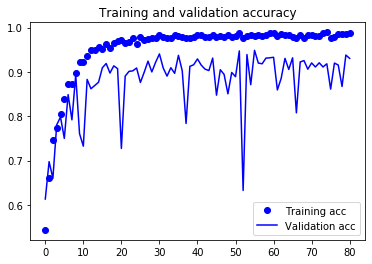

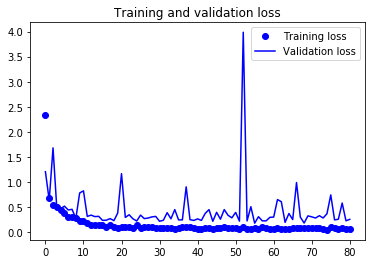

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Gender CNN 2

In [9]:
datagen=ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory="wilmabainbridge/Images",
        x_col="Filename",
        y_col="Gender",
        subset="training",
        batch_size=32,
#         seed=8,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150)
)

valid_generator = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory="wilmabainbridge/Images",
        x_col="Filename",
        y_col="Gender",
        subset="validation",
        batch_size=32,
#         seed=8,
        shuffle=True,
        class_mode='categorical',
        target_size=(150,150)
)

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory="wilmabainbridge/Images_Test",
        x_col="Filename",
        y_col=None,
        batch_size=32,
        seed=8,
        shuffle=False,
        class_mode=None,
        target_size=(150,150)
)

Found 19817 validated image filenames belonging to 2 classes.
Found 6605 validated image filenames belonging to 2 classes.
Found 570 validated image filenames.


C:\Users\whohuhwhat\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 12 invalid image filename(s) in x_col="Filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
callbacks_list = [checkpoint, es]

t1=datetime.datetime.now()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=50)
t2 = datetime.datetime.now()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 19s 193ms/step - loss: 2.4594 - acc: 0.5894 - val_loss: 1.1242 - val_acc: 0.6606

Epoch 00001: val_acc improved from -inf to 0.66063, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 13s 132ms/step - loss: 0.8727 - acc: 0.6306 - val_loss: 1.7153 - val_acc: 0.5175

Epoch 00002: val_acc did not improve from 0.66063
Epoch 3/400
100/100 [==============================] - 13s 133ms/step - loss: 0.5648 - acc: 0.7231 - val_loss: 1.4446 - val_acc: 0.6062

Epoch 00003: val_acc did not improve from 0.66063
Epoch 4/400
100/100 [==============================] - 13s 132ms/step - loss: 0.4836 - acc: 0.7834 - val_loss: 0.5282 - val_acc: 0.7169

Epoch 00004: val_acc improved from 0.66063 to 0.71688, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 13s 134ms/step - loss: 0.3842 - acc: 0.8397 - val_loss: 0.4769 - val_acc: 0.7818

Epoch 00005: val_acc improved from 0.716


Epoch 00042: val_acc did not improve from 0.94250
Epoch 43/400
100/100 [==============================] - 13s 132ms/step - loss: 0.0568 - acc: 0.9884 - val_loss: 0.2014 - val_acc: 0.9369

Epoch 00043: val_acc did not improve from 0.94250
Epoch 44/400
100/100 [==============================] - 13s 131ms/step - loss: 0.0791 - acc: 0.9820 - val_loss: 0.2809 - val_acc: 0.9075

Epoch 00044: val_acc did not improve from 0.94250
Epoch 45/400
100/100 [==============================] - 13s 132ms/step - loss: 0.0908 - acc: 0.9834 - val_loss: 0.1810 - val_acc: 0.9319

Epoch 00045: val_acc did not improve from 0.94250
Epoch 46/400
100/100 [==============================] - 13s 132ms/step - loss: 0.0778 - acc: 0.9819 - val_loss: 0.2432 - val_acc: 0.9140

Epoch 00046: val_acc did not improve from 0.94250
Epoch 47/400
100/100 [==============================] - 13s 132ms/step - loss: 0.0845 - acc: 0.9788 - val_loss: 0.2341 - val_acc: 0.9131

Epoch 00047: val_acc did not improve from 0.94250
Epoch 48/

In [14]:
model.save('gender_model2_9425.h5')

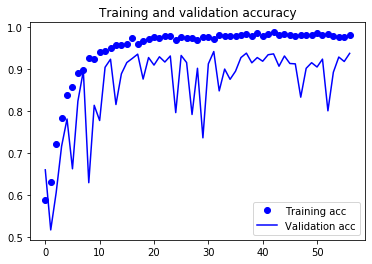

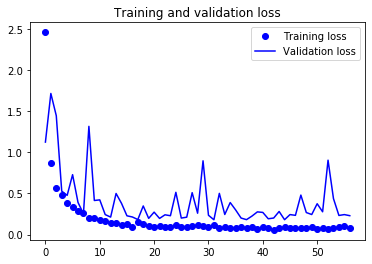

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
train_generator.class_indices

{'Female': 0, 'Male': 1}

In [17]:
pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
print('Generated {} predictions'.format(len(pred)))

18/18 [==============================] - 1s 69ms/step
Generated 570 predictions


In [19]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":pred})

Exception: Data must be 1-dimensional

In [51]:
results.Predictions.value_counts()

Female    570
Name: Predictions, dtype: int64

In [22]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [97]:
train_df.Gender.value_counts()

1    15236
0    11416
Name: Gender, dtype: int64

In [22]:
labels

{0: 'Female', 1: 'Male'}

In [43]:
def predictoneimage_cnn(model, path):
#     img = load_img(path, target_size=(150, 150))
    img = load_img(path, target_size=(150,150))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    
    gender = ["Female","Male"]
    gender_prob = np.max(predict)
    labels = gender[predict.argmax()]
    
#     predicted_class_indices=np.argmax(predict,axis=1)
#     labels = (train_generator.class_indices)
#     labels = dict((v,k) for k,v in labels.items())
#     predictions = [labels[k] for k in predicted_class_indices]
    return predict, print(labels)

    

In [44]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)

Male


(array([[0.01303, 0.98697]], dtype=float32), None)

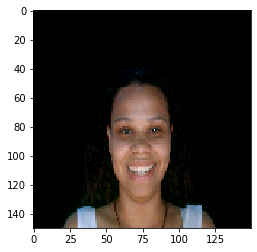

In [45]:
predictoneimage_cnn(model, 'data/happy/s002-01_img.tif')

Male


(array([[0.04619, 0.95381]], dtype=float32), None)

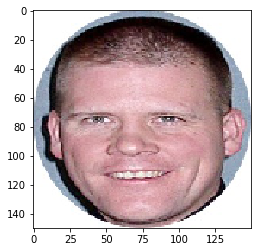

In [47]:
predictoneimage_cnn(model, 'wilmabainbridge/Images/Aaron Booth_5_oval.jpg')

Male


(array([[0.4344, 0.5656]], dtype=float32), None)

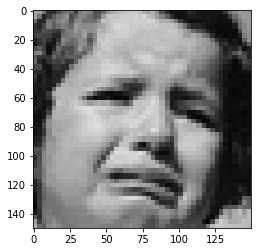

In [48]:
predictoneimage_cnn(model, 'fer2013/Test/Pred/PublicTest_5425294.jpg')

Male


(array([[0.00059, 0.99941]], dtype=float32), None)

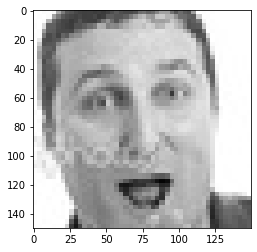

In [49]:
predictoneimage_cnn(model, 'fer2013/Test/Pred/PublicTest_8843901.jpg')

Male


(array([[0.17562, 0.82438]], dtype=float32), None)

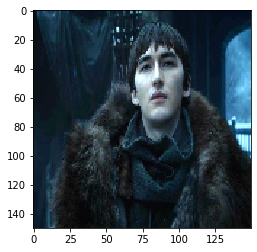

In [50]:
predictoneimage_cnn(model, 'bran.jpg')

Male


(array([[0.00036, 0.99964]], dtype=float32), None)

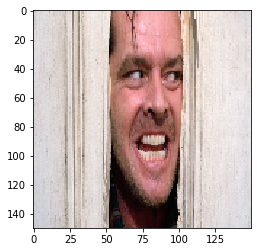

In [27]:
predictoneimage_cnn(model, 'shining.jpg')

Male


(array([[0.00001, 0.99999]], dtype=float32), None)

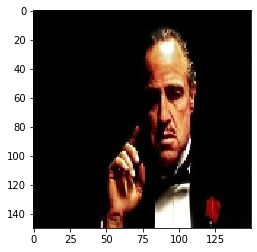

In [28]:
predictoneimage_cnn(model, 'godfather.jpg')

Male


(array([[0.0363, 0.9637]], dtype=float32), None)

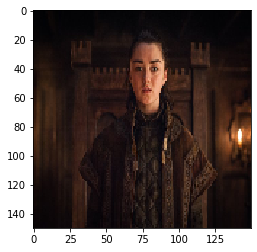

In [29]:
predictoneimage_cnn(model, 'arya.jpg')

Male


(array([[0.01323, 0.98677]], dtype=float32), None)

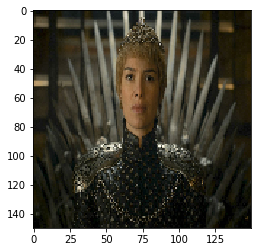

In [30]:
predictoneimage_cnn(model, 'cersei.jpg')

Male


(array([[0.00004, 0.99996]], dtype=float32), None)

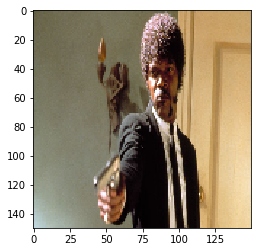

In [31]:
predictoneimage_cnn(model, 'pulp.jpg')

Male


(array([[0.00528, 0.99472]], dtype=float32), None)

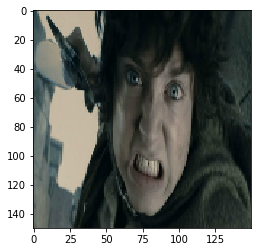

In [32]:
predictoneimage_cnn(model, 'frodo1.jpg')

Male


(array([[0.10038, 0.89962]], dtype=float32), None)

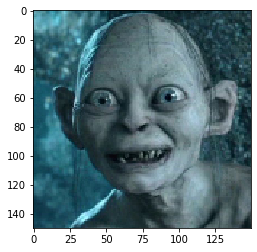

In [33]:
predictoneimage_cnn(model, 'gollum.jpg')

Male


(array([[0.02139, 0.97861]], dtype=float32), None)

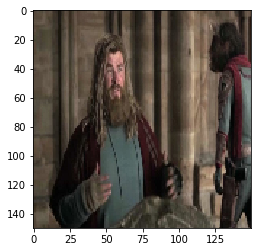

In [34]:
predictoneimage_cnn(model, 'thor.jpg')

Male


(array([[0.00004, 0.99996]], dtype=float32), None)

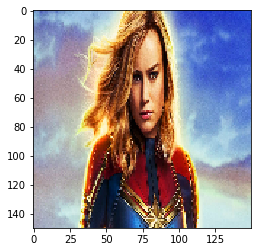

In [35]:
predictoneimage_cnn(model, 'capmarvel.jpg')

In [10]:
demo_df.Filename.value_counts()

Google_1_Debra Jankowski_7_oval.jpg        12
Google_1_Rachel Espinosa_7_oval (2).jpg    12
Google_1_Diane Mcmurray_1_oval.jpg         12
Google_1_Roberta Pelayo_5_oval.jpg         12
Google_1_Randy Hockett_17_oval.jpg         12
Google_1_Ryan Marvel_15_oval.jpg           12
Google_1_Victor Flood_3_oval.jpg           12
Google_1_Patrick Snipes_7_oval.jpg         12
Google_1_Dolores Duckett_9-oval.jpg        12
Google_1_Wanda Soukup_7_oval.jpg           12
Google_1_Vivian Tucker_9_oval.jpg          12
Albert_Dobson_9_oval.jpg                   12
Google_1_David Bourassa_5_oval.jpg         12
Google_1_Valerie Noble_9_oval.jpg          12
Google_1_Joshua Harlow_1_oval.jpg          12
Google_1_Pam Irvin_1_oval.jpg              12
Google_1_Jimmy Duda_3_oval.jpg             12
Google_1_June Nester_1_oval.jpg            12
Google_1_Paul Pruett_8_oval.jpg            12
Google_1_Loretta Hinz_15_oval.jpg          12
Google_1_Juan Carrico_3_oval.jpg           12
Google_1_Leah Langlois_10_oval.jpg

In [51]:
age = demo_df[['Filename', 'Age']]

In [59]:
age_1 = age.groupby(['Filename'])

In [62]:
age_1.head()

,Filename,Age,R_Age
0,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
1,Google_1_Danielle Goble_5_oval.jpg,2.0,NaN
2,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
3,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
4,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
12,Google_1_Phillip Owensby_9_oval.jpg,5.0,NaN
13,Google_1_Phillip Owensby_9_oval.jpg,4.0,NaN
14,Google_1_Phillip Owensby_9_oval.jpg,4.0,NaN
15,Google_1_Phillip Owensby_9_oval.jpg,4.0,NaN
16,Google_1_Phillip Owensby_9_oval.jpg,4.0,NaN


Text(0.5, 1.0, 'Age Distribution')

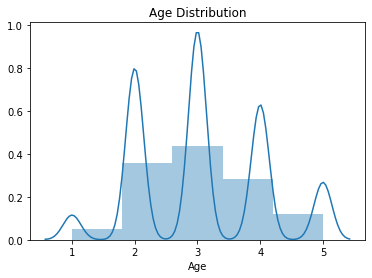

In [53]:
sns.distplot(age['Age'], bins=5).set_title("Age Distribution")

In [56]:

age['R_Age'] = age_1['Age'].mean().round()

#adam_cauthen 2.9, adrienne coen 2.8 

C:\Users\whohuhwhat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
age

,Filename,Age,R_Age
0,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
1,Google_1_Danielle Goble_5_oval.jpg,2.0,NaN
2,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
3,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
4,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
5,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
6,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
7,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
8,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN
9,Google_1_Danielle Goble_5_oval.jpg,3.0,NaN


In [7]:
race = demo_df[['Filename', 'Race']]

In [8]:
race
# 0 = Other
# 1 = White
# 2 = Black
# 3 = East Asian
# 4 = South Asain
# 5 = Hispanic
# 6 = Middle Eastern

,Filename,Race
0,Google_1_Danielle Goble_5_oval.jpg,6.0
1,Google_1_Danielle Goble_5_oval.jpg,1.0
2,Google_1_Danielle Goble_5_oval.jpg,5.0
3,Google_1_Danielle Goble_5_oval.jpg,1.0
4,Google_1_Danielle Goble_5_oval.jpg,1.0
5,Google_1_Danielle Goble_5_oval.jpg,1.0
6,Google_1_Danielle Goble_5_oval.jpg,6.0
7,Google_1_Danielle Goble_5_oval.jpg,1.0
8,Google_1_Danielle Goble_5_oval.jpg,6.0
9,Google_1_Danielle Goble_5_oval.jpg,1.0


In [23]:
demo_df.columns

Index(['Filename', 'Image #', 'Age', 'Attractive', 'Is this person famous?',
       'Common?', 'How much emotion is in this face?', 'Emotion?',
       'Eyes direction?', 'Face direction?', 'Facial hair?', 'Catch question',
       'Friendly', 'Makeup?', 'Gender',
       'Would you cast this person as the star of a movie?',
       'Would this be a good profile picture?', 'Image quality', 'Race',
       'Memorable', 'At what speed do you think this expression is happening?',
       'How much teeth is showing?'],
      dtype='object')

In [ ]:
col = ['Image #', ]

In [8]:
demo_df.describe()

,Image #,Age,Attractive,Is this person famous?,Common?,How much emotion is in this face?,Emotion?,Eyes direction?,Face direction?,Facial hair?,...,Friendly,Makeup?,Gender,Would you cast this person as the star of a movie?,Would this be a good profile picture?,Image quality,Race,Memorable,At what speed do you think this expression is happening?,How much teeth is showing?
count,26663.000000,26659.000000,26655.000000,26654.000000,26644.000000,26654.000000,26649.000000,26648.000000,26648.000000,26646.000000,...,26650.000000,26650.000000,26652.000000,26656.000000,26642.000000,26649.000000,26651.000000,26654.000000,26647.000000,26648.000000
mean,1111.512508,3.048389,2.904521,0.258610,3.026610,3.115217,1.031596,1.376201,1.830794,0.318997,...,3.442964,0.445516,0.571664,0.630027,1.301329,3.803745,1.461934,3.084190,2.922956,0.970542
std,641.456890,1.029127,1.103043,0.483021,1.016069,1.199888,1.148325,1.074715,1.491297,0.602133,...,1.113031,0.643565,0.494847,0.714176,0.805953,0.987569,1.160548,1.078662,1.202977,0.840128
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,556.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,2.000000,0.000000
50%,1112.000000,3.000000,3.000000,0.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,...,4.000000,0.000000,1.000000,0.000000,2.000000,4.000000,1.000000,3.000000,3.000000,1.000000
75%,1667.000000,4.000000,4.000000,0.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,...,4.000000,1.000000,1.000000,1.000000,2.000000,5.000000,1.000000,4.000000,4.000000,2.000000
max,2222.000000,5.000000,5.000000,2.000000,5.000000,5.000000,6.000000,5.000000,5.000000,2.000000,...,5.000000,2.000000,1.000000,2.000000,2.000000,5.000000,6.000000,5.000000,5.000000,2.000000


In [29]:
demo_df.Age.value_counts()
# 1 = < 20 years
# 2 = 20 - 30 years
# 3 = 30 - 45 years
# 4 = 45 - 60 years
# 5 = 60+ years

3.0    9325
2.0    7651
4.0    6029
5.0    2555
1.0    1099
Name: Age, dtype: int64

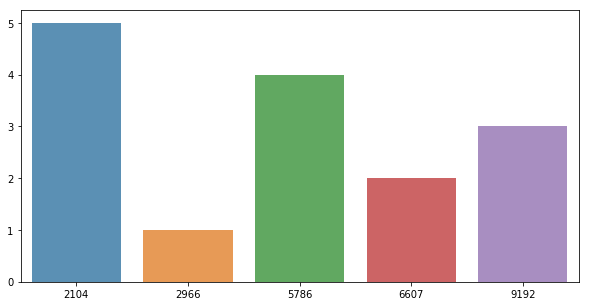

In [61]:
att_count = demo_df['Attractive'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(att_count.values, att_count.index, alpha=0.8)
plt.show()

In [30]:
demo_df.Attractive.value_counts()
# 1 (unattractive) - 5 (attractive)

3.0    9192
2.0    6607
4.0    5786
1.0    2966
5.0    2104
Name: Attractive, dtype: int64

In [34]:
demo_df.Friendly.value_counts()
#1 very unfriendly - 5 very friendly

4.0    9096
3.0    7499
5.0    4782
2.0    3691
1.0    1582
Name: Friendly, dtype: int64

In [33]:
demo_df['Common?'].value_counts()

3.0    9679
2.0    6810
4.0    6635
5.0    1981
1.0    1539
Name: Common?, dtype: int64

In [35]:
demo_df.Gender.value_counts()
#0 female, 1 male

1.0    15236
0.0    11416
Name: Gender, dtype: int64

In [36]:
demo_df['Would you cast this person as the star of a movie?'].value_counts()
#0 = no, 1 = maybe, 2 = yes

0.0    13553
1.0     9412
2.0     3691
Name: Would you cast this person as the star of a movie?, dtype: int64

In [37]:
demo_df.Race.value_counts()
# 0 = Other
# 1 = White
# 2 = Black
# 3 = East Asian
# 4 = South Asain
# 5 = Hispanic
# 6 = Middle Eastern

1.0    20984
2.0     2593
5.0     1262
3.0      664
6.0      501
4.0      371
0.0      276
Name: Race, dtype: int64

In [38]:
demo_df.Memorable.value_counts()

3.0    8804
4.0    7494
2.0    5906
5.0    2389
1.0    2061
Name: Memorable, dtype: int64

In [12]:
psy_df = pd.read_excel('psychology-attributes.xlsx')

In [13]:
psy_df

,Filename,Image #,atypical,boring,calm,catch,catchAns,cold,common,confident,...,sociable,subID.1,subage.1,submale.1,subrace.1,typical,uncertain,uncommon,unintelligent,untrustworthy
0,Google_1_Danielle Goble_5_oval.jpg,1,4.0,6.0,6.0,7.0,7.0,6.0,5.0,7.0,...,4.0,670,2.0,1.0,0.0,4.0,3.0,5.0,5.0,6.0
1,Google_1_Danielle Goble_5_oval.jpg,1,3.0,9.0,6.0,9.0,9.0,1.0,8.0,4.0,...,8.0,306,4.0,1.0,1.0,7.0,2.0,2.0,1.0,2.0
2,Google_1_Danielle Goble_5_oval.jpg,1,5.0,5.0,6.0,8.0,8.0,5.0,5.0,7.0,...,6.0,1274,3.0,0.0,2.0,5.0,4.0,7.0,4.0,4.0
3,Google_1_Danielle Goble_5_oval.jpg,1,4.0,7.0,4.0,5.0,5.0,5.0,5.0,5.0,...,5.0,1150,5.0,0.0,1.0,5.0,3.0,4.0,1.0,1.0
4,Google_1_Danielle Goble_5_oval.jpg,1,3.0,5.0,5.0,7.0,7.0,5.0,5.0,6.0,...,1.0,412,2.0,0.0,1.0,9.0,1.0,1.0,1.0,4.0
5,Google_1_Danielle Goble_5_oval.jpg,1,2.0,2.0,7.0,4.0,4.0,2.0,6.0,7.0,...,6.0,944,2.0,1.0,1.0,1.0,7.0,7.0,3.0,1.0
6,Google_1_Danielle Goble_5_oval.jpg,1,6.0,7.0,5.0,9.0,9.0,5.0,7.0,2.0,...,4.0,876,3.0,1.0,1.0,7.0,3.0,2.0,4.0,6.0
7,Google_1_Danielle Goble_5_oval.jpg,1,6.0,6.0,6.0,4.0,4.0,5.0,6.0,7.0,...,5.0,749,3.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0
8,Google_1_Danielle Goble_5_oval.jpg,1,4.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,...,4.0,526,3.0,0.0,1.0,9.0,6.0,6.0,6.0,2.0
9,Google_1_Danielle Goble_5_oval.jpg,1,3.0,3.0,8.0,5.0,5.0,2.0,8.0,8.0,...,6.0,84,2.0,1.0,3.0,4.0,6.0,5.0,3.0,4.0


In [25]:
psy_df.describe()

,Image #,atypical,boring,calm,catch,catchAns,cold,common,confident,egotistic,...,sociable,subID.1,subage.1,submale.1,subrace.1,typical,uncertain,uncommon,unintelligent,untrustworthy
count,33430.000000,33390.000000,33389.000000,33385.000000,33408.000000,33428.000000,33400.000000,33398.000000,33397.000000,33397.000000,...,33388.000000,33430.000000,33201.000000,33175.000000,33198.000000,33403.000000,33395.000000,33398.000000,33402.000000,33394.000000
mean,1110.716273,4.098053,4.296535,5.807249,5.009459,5.006611,3.730719,5.326816,5.921759,4.082762,...,5.817419,681.194167,2.726093,0.533534,1.510362,5.290752,3.719239,3.876639,3.416891,3.653980
std,640.647321,2.098698,2.169519,1.876605,2.566475,2.570928,2.244682,1.917886,1.840822,2.195249,...,1.977416,373.772883,0.920370,0.498882,1.170805,1.963549,2.062853,2.040696,1.978189,2.114705
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,558.000000,2.000000,3.000000,5.000000,3.000000,3.000000,2.000000,4.000000,5.000000,2.000000,...,5.000000,355.000000,2.000000,0.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000
50%,1108.000000,4.000000,4.000000,6.000000,5.000000,5.000000,3.000000,5.000000,6.000000,4.000000,...,6.000000,698.000000,3.000000,1.000000,1.000000,5.000000,3.000000,4.000000,3.000000,3.000000
75%,1665.000000,6.000000,6.000000,7.000000,7.000000,7.000000,5.000000,7.000000,7.000000,6.000000,...,7.000000,1001.000000,3.000000,1.000000,1.000000,7.000000,5.000000,5.000000,5.000000,5.000000
max,2222.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,1274.000000,5.000000,1.000000,6.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [40]:
psy_df.intelligent.value_counts()

7.0    8081
6.0    7656
5.0    6109
8.0    3688
4.0    2673
3.0    2006
9.0    1419
2.0    1053
1.0     713
Name: intelligent, dtype: int64

In [41]:
psy_df.responsible.value_counts()

7.0    7628
6.0    7218
5.0    5570
8.0    4213
4.0    2822
3.0    2141
9.0    1862
2.0    1024
1.0     920
Name: responsible, dtype: int64

In [43]:
psy_df.trustworthy.value_counts()

6.0    7272
7.0    6808
5.0    5880
8.0    3565
4.0    3393
3.0    2571
9.0    1444
2.0    1434
1.0    1030
Name: trustworthy, dtype: int64

In [44]:
psy_df.confident.value_counts()

7.0    7622
6.0    7405
5.0    5059
8.0    4296
4.0    2974
3.0    2309
9.0    2097
2.0     991
1.0     644
Name: confident, dtype: int64

In [46]:
psy_df.kind.value_counts()

7.0    7019
6.0    7009
5.0    5262
8.0    3893
4.0    3324
3.0    2616
9.0    1737
2.0    1579
1.0     946
Name: kind, dtype: int64

In [47]:
psy_df.introverted.value_counts()

3.0    5418
2.0    5320
1.0    5167
5.0    4449
4.0    4219
6.0    3964
7.0    2830
8.0    1461
9.0     567
Name: introverted, dtype: int64

In [48]:
psy_df.egotistic.value_counts()

2.0    5170
3.0    5039
1.0    4772
5.0    4669
6.0    4275
4.0    4022
7.0    3286
8.0    1438
9.0     726
Name: egotistic, dtype: int64